# TMDB Box office prediction EDA

## pipeline
### 1. load in data and import packages
### 2. data cleaning
### 3. visualizing correlation with numerical variables
    histogram and correlation map
    heatmap with numerical variables, budget, popularity, runtime, revenue
### 4. analysis with time variable, release data
    1. barplot of release year
    2. barplot of release day
    3. barplot of release month, count of release month
    4. barplot of release quarter, count of release quarter

In [1]:
#1. load in data and import packages
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#1. load in data and import packages
file = '/Users/Sue/Documents/study2020/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/0721wragling_train_t2.csv'
df_train = pd.read_csv(file)
df_train.head(3)

,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,14000000,Comedy,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Metro-Goldwyn-Mayer (MGM),Paramount Pictures,U...",United States of America,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"duringcreditsstinger,hot tub,sequel,time travel","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"Comedy,Drama,Family,Romance",en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,United States of America,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,falling in love,marriage","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,Drama,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"Blumhouse Productions,Bold Films,Right of Way ...",United States of America,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"conservatory,drummer,jazz,jazz band,montage,mu...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


# 2  data cleaning
## 1. keep numerical variable and datetime
### budget, runtime, popularity, release_date
## 2. genre
## 3. original_language
## 4. original_title
## 5. poster_path
## 6. production_companies
## 7. production_countries
## 8. spoken_languages
## 9. status
## 10. title
## 11. cast
## 12. crew

## 1. keep numerical variable and datetime

In [3]:
#1. drop columns where budget is 0
#df_train = df_train[df_train['budget'] != 0 ]

## 2. genre

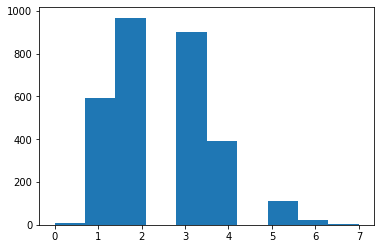

In [4]:
#2. genre
# firstly, check how many genres each movie has
gi = df_train['genres'].str.split(pat = ',')
length = list(0 for i in range(gi.count()))
for i in range(gi.count()):
#    print(type(gi[i]))
    if type(gi[i]) == list :
        length[i]=len(gi[i])
#print(max(length), np.median(length))
plt.hist(length)
plt.show()

From the histogram we observed that most movies has genres and varies from 0~7, median is 2. 
To analysis the impact of genres, will firstly get top 2 genres, and also the number of genres as three new variables to replace the variable of genre.

In [5]:
df_train['genre_1'] = ''
df_train['genre_2'] = ''
for i in range(gi.count()):
    if type(gi[i]) == list :
        df_train['genre_length']=len(gi[i])
        if len(gi[i]) >= 2:
            df_train['genre_1'][i] = gi[i][0]
            df_train['genre_2'][i] = gi[i][1]
        elif len(gi[i]) == 1:
            df_train['genre_1'][i] = gi[i][0]
            df_train['genre_2'][i] = 'no genre'               
    else:
        df_train['genre_length']= 0
        df_train['genre_1'][i] = 'no genre'
        df_train['genre_2'][i] = 'no genre'
df_train.sample(3)

/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,status,tagline,title,Keywords,cast,crew,revenue,genre_1,genre_2,genre_length
235,0,"Adventure,Family",en,The Last Mimzy,6.183051,/Gqdd45hvij3e9p6wQMHS82q8mE.jpg,"Michael Phillips Productions,New Line Cinema",United States of America,2007-02-09,94.0,...,Released,An intergalactic package from light years away...,The Last Mimzy,"children,cuddle rabbit,parent child relationship","[{'cast_id': 17, 'character': 'Noah Wilder', '...","[{'credit_id': '52fe4348c3a36847f8048531', 'de...",27297451,Adventure,Family,5
983,26000000,"Drama,Horror,Science Fiction,Thriller",en,Flatliners,11.890138,/3CoUzgCU8kR2UCXovrvfNAjvWkI.jpg,"Columbia Pictures Corporation,Stonebridge Ente...",United States of America,1990-08-09,115.0,...,Released,Some lines shouldn't be crossed.,Flatliners,"afterlife,confetti,life and death,medical stud...","[{'cast_id': 1, 'character': 'Nelson', 'credit...","[{'credit_id': '52fe42fdc3a36847f8031f83', 'de...",61489265,Drama,Horror,5
270,21000000,"Comedy,Family",en,Diary of a Wimpy Kid: Rodrick Rules,8.425361,/b7ASKxUMqgarJIN4pH3Q8hbyPGA.jpg,"Color Force,Fox 2000 Pictures",United States of America,2011-03-25,99.0,...,Released,Welcome to the next grade,Diary of a Wimpy Kid: Rodrick Rules,"based on novel,middle school","[{'cast_id': 1, 'character': 'Greg Heffley', '...","[{'credit_id': '52fe461fc3a368484e080071', 'de...",72417394,Comedy,Family,5


## 3. original language

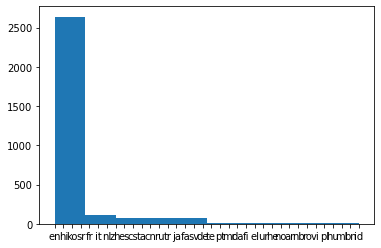

In [6]:
#3. original language
plt.hist(df_train['original_language'])
plt.show()

over 90% original language is english, will define a new variable as en/ no-en

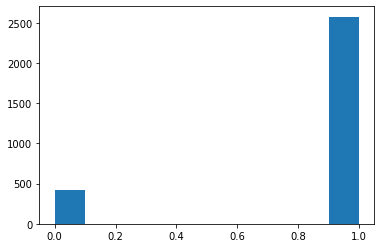

In [7]:
df_train['original_language_en']= [1 if x =='en' else 0 for x in df_train['original_language']]
plt.hist(df_train['original_language_en'])
plt.show()

## 4. original_title, title

In [8]:
#4. original_title, title
diff_title = df_train[df_train['original_title']!=df_train['title']][['original_title','title']]
print(diff_title)

            original_title              title
4                     마린보이         Marine Boy
15                 Šišanje           Skinning
30            Intouchables   The Intouchables
45           La doppia ora    The Double Hour
50    Aanrijding in Moscou    Moscow, Belgium
...                    ...                ...
2963                    恋空        Sky Of Love
2972                   龍虎門  Dragon Tiger Gate
2980       ആക്ഷൻ ഹീറോ ബിജു   Action Hero Biju
2988                    ده                Ten
2996           Vi är bäst!   We Are the Best!

[351 rows x 2 columns]


## 5. poster path

original title is not in unique language, while title is in english translation. to simplify the model building, will keep the 'title' and delete the variable original title.

In [9]:
#5 poster path
# will delete this column for now.
# tagline, title, and Keywords are all about describtion of movie, will keep title and delete Keywords, tagline for now.
# summarize and clean up dataframe
df_train = df_train.drop(['genres','original_language','original_title','poster_path','tagline','Keywords'], axis = 1)
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_1,genre_2,genre_length,original_language_en
1546,0,6.231928,"Cine Mosaic,Doha Film Institute, The,Mirabai F...","Qatar,United Kingdom,United States of America",2013-03-17,130.0,"en,ur",Released,The Reluctant Fundamentalist,"[{'cast_id': 7, 'character': 'Changez', 'credi...","[{'credit_id': '52fe4a6ac3a368484e151e79', 'de...",519535,Thriller,no genre,5,1
2790,40000000,7.196688,"Castle Rock Entertainment,Flower Films (II),Re...",United States of America,2007-02-09,96.0,en,Released,Music and Lyrics,"[{'cast_id': 1, 'character': 'Sophie Fisher', ...","[{'credit_id': '52fe44079251416c7502687b', 'de...",145896422,Comedy,Music,5,1
2917,0,16.179384,"All Girl Productions,Silver Screen Partners IV...",United States of America,1988-12-21,123.0,en,Released,Beaches,"[{'cast_id': 2, 'character': ""Cecilia 'CC' Car...","[{'credit_id': '52fe46699251416c750777ed', 'de...",57041866,Comedy,Drama,5,1


## 6. production companies

In [10]:
#6. production companies
df_train.count()

budget                  3000
popularity              3000
production_companies    2844
production_countries    2945
release_date            3000
runtime                 3000
spoken_languages        2980
status                  3000
title                   3000
cast                    2987
crew                    2984
revenue                 3000
genre_1                 3000
genre_2                 3000
genre_length            3000
original_language_en    3000
dtype: int64

In [11]:
# production_companies has 5% data missing, will fill those missing values as unkown.
df_train = df_train[df_train['production_companies'].notna()]
df_train.count()

budget                  2844
popularity              2844
production_companies    2844
production_countries    2833
release_date            2844
runtime                 2844
spoken_languages        2836
status                  2844
title                   2844
cast                    2831
crew                    2829
revenue                 2844
genre_1                 2844
genre_2                 2844
genre_length            2844
original_language_en    2844
dtype: int64

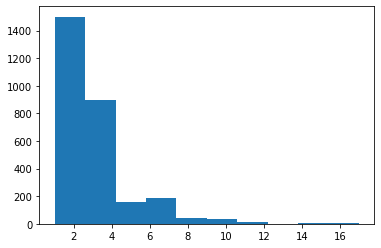

In [12]:
# for each movie, not only one company is involved in production, so will add a new feature to count the number of companies.
df_train = df_train.reset_index(drop = True)
comp = df_train['production_companies'].str.split(pat = ',')
length = list(0 for i in range(comp.count()))
for i in range(comp.count()):
    length[i]=len(comp[i])
plt.hist(length)
plt.show()

In [13]:
df_train['num_comp']=length
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_1,genre_2,genre_length,original_language_en,num_comp
2136,90000000,8.184815,"Cinergi Pictures Entertainment,Hollywood Pictures",United States of America,1995-06-30,96.0,en,Released,Judge Dredd,"[{'cast_id': 1, 'character': 'Judge Joseph Dre...","[{'credit_id': '52fe44fdc3a36847f80b62b9', 'de...",113493481,Science Fiction,no genre,5,1,2
848,0,5.787334,"IDT Entertainment,Starz Animation,Twentieth Ce...","Canada,United States of America",2006-09-15,88.0,"cs,da,en",Released,Everyone's Hero,"[{'cast_id': 1, 'character': 'Lefty Maginnis (...","[{'credit_id': '55685d9c92514146c6001516', 'de...",16627188,Action,Adventure,5,1,3
427,1288000,8.590813,Selznick International Pictures,United States of America,2040-04-12,130.0,"en,fr",Released,Rebecca,"[{'cast_id': 10, 'character': ""'Maxim' de Wint...","[{'credit_id': '52fe4228c3a36847f8008885', 'de...",6000000,Drama,Mystery,5,1,1


In [14]:
# new feature, weather the production company is in top 30.
list_company = []
for count, ele in enumerate(df_train['production_companies']):
    items = ele.strip().split(',')
 #   print(items)
    list_company+=items
top_companies = [m[0] for m in collections.Counter([i for i in list_company]).most_common(30)]
print(top_companies)

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures', 'Walt Disney Pictures', 'Columbia Pictures Corporation', 'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists', 'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises', ' The', 'BBC Films', 'Dune Entertainment', 'Working Title Films', 'Fox Searchlight Pictures', 'StudioCanal', 'Lionsgate', 'DreamWorks SKG', 'Fox 2000 Pictures', 'Summit Entertainment', 'Hollywood Pictures', 'Orion Pictures', 'Amblin Entertainment']


In [15]:
for g in top_companies:
    df_train['top_companies'] = df_train['production_companies'].apply(lambda x: 1 if g in x else 0)
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_1,genre_2,genre_length,original_language_en,num_comp,top_companies
1596,41000000,12.929653,"Bernard Gayle Productions,De Line Pictures,The...",United States of America,2009-03-20,105.0,en,Released,"I Love You, Man","[{'cast_id': 1, 'character': 'Peter Klaven', '...","[{'credit_id': '587ea380c3a36846c302260a', 'de...",91636986,Comedy,no genre,5,1,3,0
1800,0,6.122067,Michael Obel Productions,United States of America,1997-01-31,102.0,en,Released,Nightwatch,"[{'cast_id': 3, 'character': 'Martin Bells', '...","[{'credit_id': '5633e932925141284c015de9', 'de...",1179002,Action,Drama,5,1,1,0
776,110000000,8.555544,Walt Disney Pictures,United States of America,2004-04-02,76.0,"en,zh",Released,Home on the Range,"[{'cast_id': 21, 'character': 'Maggie (voice)'...","[{'credit_id': '55685d7b92514156b600202d', 'de...",103951461,Animation,Family,5,1,1,0


## 7. production_countries

In [16]:
#7. production contries
df_train = df_train[df_train['production_countries'].notna()]
df_train = df_train.reset_index(drop = True)

In [17]:
# keep two primary production countries, drop column production_companies, production_countries
country = df_train['production_countries'].str.split(pat = ',')
length = list(0 for i in range(country.count()))
df_train['country_1'] = ''
df_train['country_2'] = ''
for i in range(country.count()):
    if type(country[i]) == list :
        length[i]=len(country[i])
for i in range(country.count()):
    if type(country[i]) == list :
        df_train['country_length']=len(country[i])
        if len(country[i]) >=2:
            df_train['country_1'][i] = country[i][0]
            df_train['country_2'][i] = country[i][1]
        elif len(country[i]) ==1:
            df_train['country_1'][i] = country[i][0]
            df_train['country_2'][i] = 'no country'               
df_train = df_train.drop(['production_companies','production_countries'],axis = 1)
df_train.sample(3)

/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Sue/opt/anaconda3

,budget,popularity,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_1,genre_2,genre_length,original_language_en,num_comp,top_companies,country_1,country_2,country_length
45,12000000,4.473327,2065-07-01,160.0,"en,it",Released,The Great Race,"[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333,Adventure,Comedy,5,1,1,0,United States of America,no country,1
1867,1900000,2.004745,2005-07-01,123.0,hi,Released,Sarkar,"[{'cast_id': 1, 'character': 'Subhash Nagre (S...","[{'credit_id': '576bae81c3a36864910013fc', 'de...",5900000,Action,Crime,5,0,1,0,India,no country,1
2320,22000000,11.654349,1990-11-09,181.0,en,Released,Dances with Wolves,"[{'cast_id': 12, 'character': 'Lieutenant Dunb...","[{'credit_id': '52fe4255c3a36847f801630d', 'de...",424208848,Adventure,Drama,5,1,2,0,United Kingdom,United States of America,1


## 8. spoken language

In [18]:
#8. spoken languages
#number of spoken languages, and if english is one of them
df_train['spoken_languages'].fillna(value = 'no',inplace = True)
spk = df_train['spoken_languages'].str.split(pat = ',')
length = list(0 for i in range(spk.count()))
for i in range(spk.count()):
    if type(spk[i]) == list and spk[i] != 'no':
        length[i]=len(spk[i])
df_train['num_spoken']=length

In [19]:
df_train['spoken_en'] = df_train['spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

In [20]:
df_train.sample(10)

,budget,popularity,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,...,genre_2,genre_length,original_language_en,num_comp,top_companies,country_1,country_2,country_length,num_spoken,spoken_en
2394,3500000,5.899155,2010-07-09,106.0,en,Released,The Kids Are All Right,"[{'cast_id': 2, 'character': 'Jules', 'credit_...","[{'credit_id': '52fe47319251416c9106d029', 'de...",34705850,...,Drama,5,1,8,0,United States of America,no country,1,1,1
1442,0,2.238458,1988-08-18,95.0,en,Released,1969,"[{'cast_id': 3, 'character': 'Ralph Carr', 'cr...","[{'credit_id': '52fe4748c3a36847f812cf39', 'de...",5979011,...,War,5,1,2,0,United States of America,no country,1,1,1
533,80000000,9.554067,2010-01-29,117.0,en,Released,Edge of Darkness,"[{'cast_id': 2, 'character': 'Thomas Craven', ...","[{'credit_id': '52fe44c99251416c75040e1b', 'de...",74901339,...,Drama,5,1,4,0,United Kingdom,United States of America,1,1,1
1328,0,8.982960,2011-10-06,127.0,"ar,fr",Released,Polisse,"[{'cast_id': 7, 'character': 'Nadine', 'credit...","[{'credit_id': '52fe4826c3a368484e0eb6d9', 'de...",20374201,...,no genre,5,0,4,0,France,no country,1,2,0
878,40000000,49.247505,2017-02-08,122.0,"en,it",Released,John Wick: Chapter 2,NaN,NaN,171539887,...,Crime,5,1,3,0,United States of America,no country,1,2,1
158,0,5.524866,1987-10-11,102.0,en,Released,House of Games,"[{'cast_id': 4, 'character': 'Margaret Ford', ...","[{'credit_id': '52fe4515c3a368484e04795b', 'de...",2585639,...,Drama,5,1,1,0,United States of America,no country,1,1,1
2365,25000000,13.018491,1998-10-16,89.0,en,Released,Bride of Chucky,"[{'cast_id': 15, 'character': 'Chucky', 'credi...","[{'credit_id': '52fe44a39251416c7503bce9', 'de...",50671850,...,Horror,5,1,2,0,Canada,United States of America,1,1,1
195,0,8.096719,1994-04-22,96.0,"en,fr",Released,Brainscan,"[{'cast_id': 4, 'character': 'Michael', 'credi...","[{'credit_id': '52fe45dc9251416c75064faf', 'de...",4352094,...,Horror,5,1,3,0,Canada,United Kingdom,1,2,1
237,11178,0.079287,2012-09-05,104.0,tl,Released,Voracious,"[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'credit_id': '52fe4a5cc3a368484e14eef3', 'de...",34659,...,Drama,5,1,3,0,Philippines,no country,1,1,0
2323,18000000,7.471655,1986-10-05,103.0,en,Released,Peggy Sue Got Married,"[{'cast_id': 2, 'character': 'Charlie Bodell',...","[{'credit_id': '52fe43079251416c75000b0f', 'de...",41382841,...,Drama,5,1,2,0,United States of America,no country,1,1,1


## 9. status

In [21]:
#9. status
df_train['status'].value_counts()

Released    2832
Rumored        1
Name: status, dtype: int64

In [22]:
#delete Rumorsed status
df_train = df_train[df_train['status']!= 'Rumored']
df_train['status'].value_counts()
df_train = df_train.drop(['status'], axis = 1)

## 10. title

In [23]:
#10. title
df_train['title'].isnull

<bound method Series.isnull of 0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                 The Possession
4                         Muppet Treasure Island
                          ...                   
2828                                     Chasers
2829                            We Are the Best!
2830                     The Long Kiss Goodnight
2831                            Along Came Polly
2832                                   Abduction
Name: title, Length: 2832, dtype: object>

## 11. cast

In [24]:
#11. cast
df_train['cast'][0]
# cast column has cast_id, character, credit_id, gender, id, name, order, profile_path subcolumns. Would like to see how gender affect the revenue

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [25]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [26]:
#create new feature, number of cast genders in a movie , gender 1 = female, gender 2 = male, gender 0 = unknown
list_of_cast_genders = list(df_train['cast'].apply(lambda x: [i['gender'] for i in get_dictionary(x)] if x != {} else []).values)
collections.Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27305), (0, 19765), (1, 13223)]

In [27]:
df_train['genders_0_cast'] =df_train['cast'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_train['genders_1_cast'] = df_train['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_train['genders_2_cast'] = df_train['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_train['num_cast'] = df_train['cast'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

## 12. crew

In [28]:
#12 crew
# will also anlyze the number of crews and gender of crew
df_train['genders_0_crew'] =df_train['crew'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_train['genders_1_crew'] = df_train['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_train['genders_2_crew'] = df_train['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_train['num_crew'] = df_train['crew'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

In [29]:
df_train = df_train[df_train['budget'] != 0]

In [30]:
df_train = df_train.drop(['cast', 'crew'], axis = 1)
df_train.sample(5)

,budget,popularity,release_date,runtime,spoken_languages,title,revenue,genre_1,genre_2,genre_length,...,num_spoken,spoken_en,genders_0_cast,genders_1_cast,genders_2_cast,num_cast,genders_0_crew,genders_1_crew,genders_2_crew,num_crew
1575,185000000,123.167259,2008-07-16,152.0,"en,zh",The Dark Knight,1004558444,Action,Crime,5,...,2,1,80,8,46,134,49,6,26,81
743,8,4.222195,2005-08-04,133.0,"en,ko",Welcome to Dongmakgol,33579813,Comedy,Drama,5,...,2,1,2,1,5,8,7,0,3,10
2195,6400000,12.203066,2011-10-17,99.0,en,My Week with Marilyn,35057696,Drama,no genre,5,...,1,1,1,6,9,16,1,4,6,11
1552,1400000,12.063080,2050-11-09,138.0,"en,fr",All About Eve,63463,Drama,no genre,5,...,2,1,2,11,8,21,12,2,11,25
1671,1070000,0.170074,1998-05-28,95.0,en,Forever Fever,570000,Comedy,Foreign,5,...,1,1,0,2,3,5,6,1,5,12


### Revenue less than 100 are suspicious datapoints, will delete them

In [31]:
df_train = df_train[df_train['revenue']>=100]
df_train.sample(5)

,budget,popularity,release_date,runtime,spoken_languages,title,revenue,genre_1,genre_2,genre_length,...,num_spoken,spoken_en,genders_0_cast,genders_1_cast,genders_2_cast,num_cast,genders_0_crew,genders_1_crew,genders_2_crew,num_crew
2601,25000000,14.686487,2002-12-27,114.0,en,The Hours,41597830,Drama,no genre,5,...,1,1,3,9,7,19,5,3,10,18
1116,747000,2.775402,2068-03-22,107.0,fr,The Bride Wore Black,44566,Crime,Drama,5,...,1,0,7,2,8,17,4,0,6,10
1294,12000000,4.926507,2006-10-27,116.0,en,Running with Scissors,6754898,Comedy,Drama,5,...,1,1,2,8,6,16,15,3,10,28
2741,75000000,9.883727,1991-05-24,137.0,en,Backdraft,152368585,Action,Crime,5,...,1,1,4,2,12,18,63,8,22,93
1211,700000,11.118844,2032-05-25,112.0,en,Grand Hotel,2594000,Drama,Romance,5,...,1,1,6,5,15,26,3,0,4,7


In [32]:
df_train.shape

(2095, 26)

In [33]:
df_train.to_csv('/Users/Sue/Documents/study2020/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/0928_eda.csv',index = False)